In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
hosp = pd.read_csv("../data/output/AverageReadmissionRatioByState.csv")
hosp.shape

(51, 2)

In [6]:
hosp.tail()

,State,Excess Readmission Ratio
46,VT,0.957130
47,WA,0.969821
48,WI,0.968758
49,WV,1.018036
50,WY,0.993947


In [7]:
esrd = pd.read_csv("../data/input/DialysisCareQualityData.csv")
esrd.shape

(6574, 59)

In [8]:
esrd2 = esrd[["StateCode", "SRR"]]
esrd2.head()

,StateCode,SRR
0,AL,0.945240
1,AL,1.133493
2,AL,1.322441
3,AL,0.786654
4,AL,0.879016


In [9]:
esrd2["SRR"].describe()

count    6356.000000
mean        0.986971
std         0.288544
min         0.000000
25%         0.808467
50%         0.994469
75%         1.172126
max         2.295119
Name: SRR, dtype: float64

In [10]:
esrd3 = esrd2.dropna()
esrd3.shape

(6356, 2)

In [11]:
esrd4 = esrd3.groupby('StateCode').mean()
esrd4.head()

,SRR
StateCode,
AK,0.795926
AL,0.932061
AR,0.995192
AS,0.279417
AZ,0.932405


In [12]:
esrd4.shape

(56, 1)

In [13]:
df = pd.merge(hosp, esrd4, left_on='State', right_on='StateCode')
df.shape

(51, 3)

In [14]:
df.head()

,State,Excess Readmission Ratio,SRR
0,AK,0.956058,0.795926
1,AL,1.018150,0.932061
2,AR,1.023103,0.995192
3,AZ,0.983623,0.932405
4,CA,1.003880,0.967392


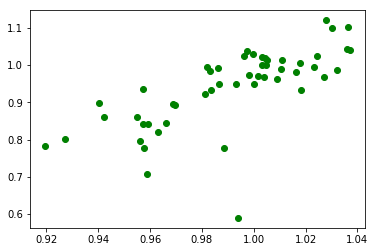

In [15]:
plt.plot(df["Excess Readmission Ratio"], df["SRR"], 'o', color='green');

C:\Users\jay\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\jay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\jay\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


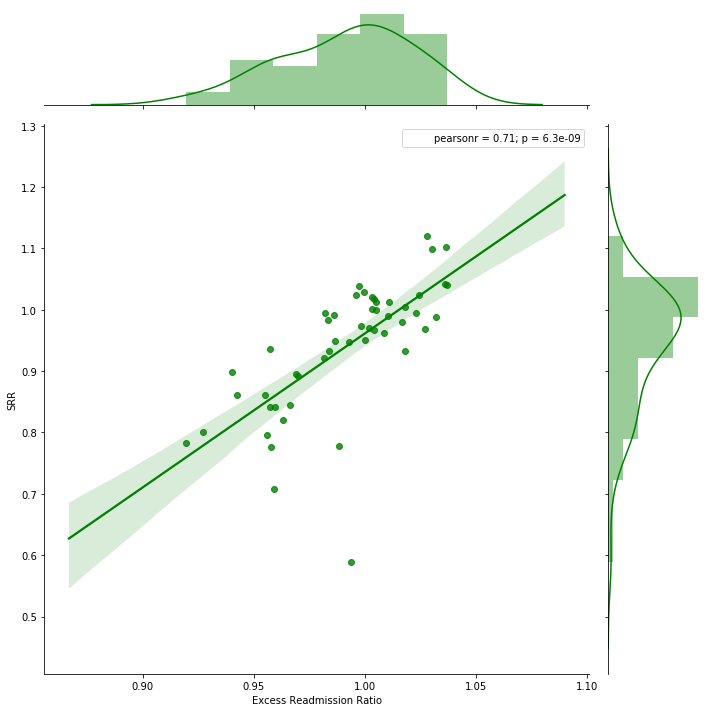

In [16]:
import scipy.stats as stats
j = sns.jointplot(x="Excess Readmission Ratio", y="SRR", data=df, size=10, color="g", kind="reg")
j.annotate(stats.pearsonr)

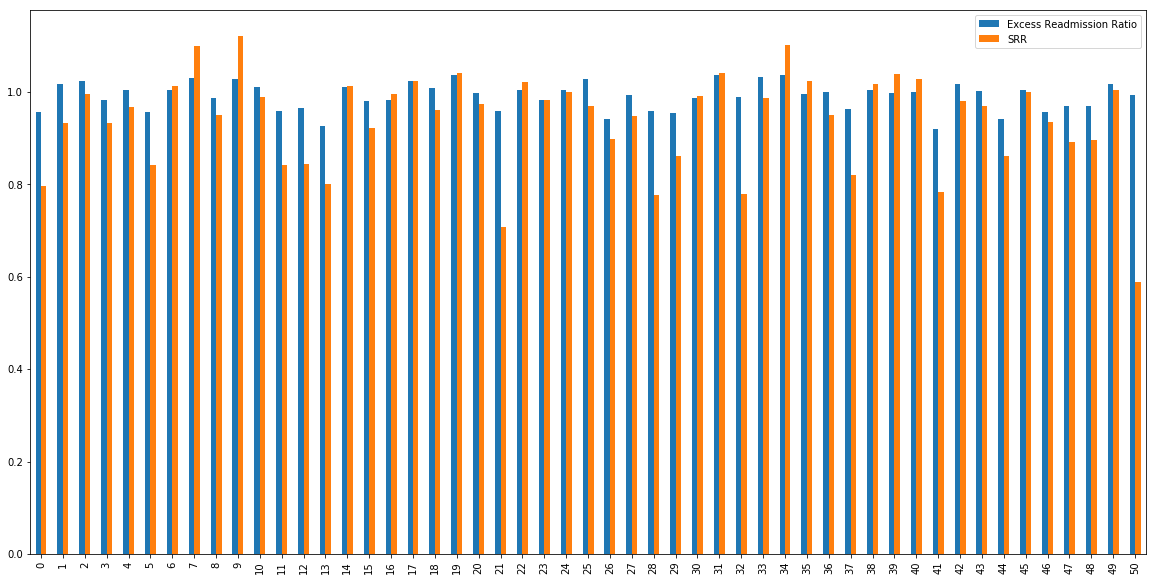

In [17]:
# Grouped bar chart
df.plot(kind="bar", figsize=(20,10))  

In [18]:
df.head()

,State,Excess Readmission Ratio,SRR
0,AK,0.956058,0.795926
1,AL,1.018150,0.932061
2,AR,1.023103,0.995192
3,AZ,0.983623,0.932405
4,CA,1.003880,0.967392


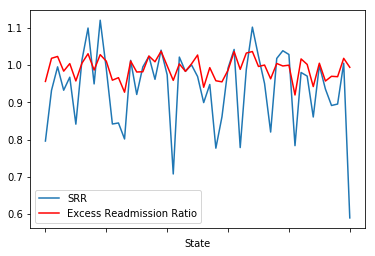

In [19]:
ax = plt.gca()

df.plot(kind='line',x="State", y="SRR" ,ax=ax)
df.plot(kind='line',x='State',y='Excess Readmission Ratio', color='red', ax=ax)

plt.show()

In [20]:
df["SRR"].mean()

0.9393735798753111

In [21]:
df.describe()

,Excess Readmission Ratio,SRR
count,51.000000,51.000000
mean,0.991212,0.939374
std,0.029532,0.104667
min,0.919639,0.589575
25%,0.967446,0.876168
50%,0.997538,0.969150
75%,1.010593,1.008740
max,1.037059,1.120314


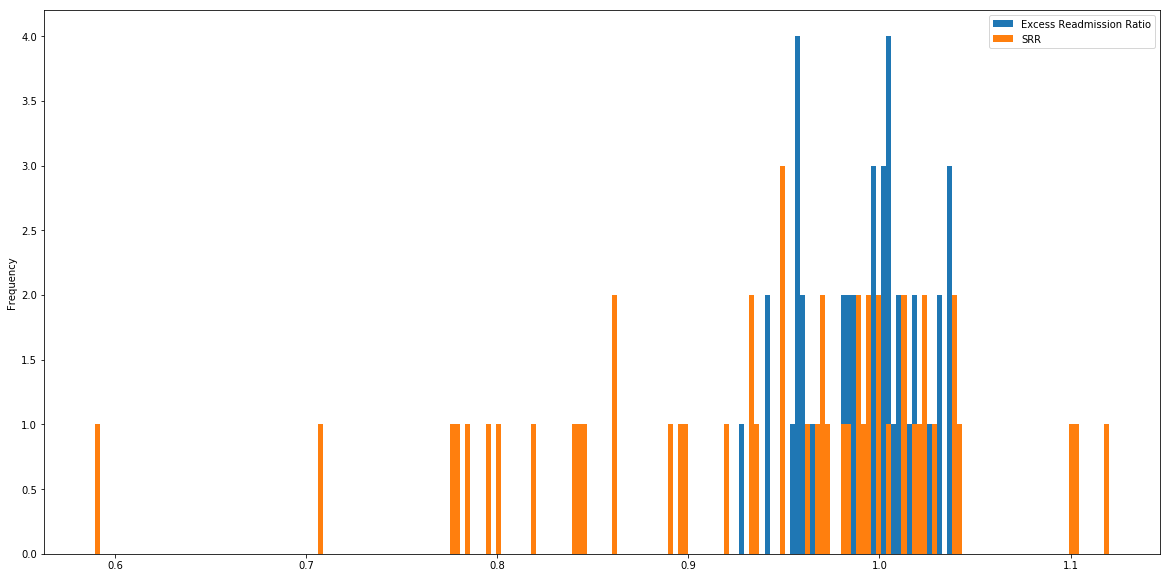

In [22]:
df.plot(kind="hist", figsize=(20, 10), bins = 200)